In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_svmlight_file
import pdb
from sklearn import svm, linear_model
from sklearn.ensemble import RandomForestClassifier
import random

In [2]:
#Load data from given files
from itertools import izip_longest
import csv
with open('dexter_train.labels', 'rb') as csv1,open('dexter_train.data', 'rb') as csv2,open('concat.txt', 'w') as out:
    spam1 = csv.reader(csv1)
    spam2 = csv.reader(csv2)
    last_column=list(izip_longest(*spam2))[-1]
    for i,j in  izip_longest(spam1,last_column):
        out.write(','.join([t.strip(';') for t in i])+' '+j+'\n')
        
from itertools import izip_longest
import csv
with open('dexter_valid.labels', 'rb') as csv1,open('dexter_valid.data', 'rb') as csv2,open('valid.txt', 'w') as out:
    spam1 = csv.reader(csv1)
    spam2 = csv.reader(csv2)
    last_column=list(izip_longest(*spam2))[-1]
    for i,j in  izip_longest(spam1,last_column):
        out.write(','.join([t.strip(';') for t in i])+' '+j+'\n')

In [3]:
# trainLabl=np.genfromtxt('dexter_train.labels')
TrainData = load_svmlight_file("concat.txt")#created in the cell above
valid=load_svmlight_file('valid.txt')#created in the cell above

In [4]:
XTr=TrainData[0] #training data
Yt=TrainData[1] #training label
Xval=valid[0] # validating data
Yv=valid[1] # validating labels
#concatinate training+validation data to do cross validation


In [5]:
N,d=XTr.shape
Xt=XTr.todense()
Xv=Xval.todense()
for i in range(N):    
    Xt[i,:]=Xt[i,:]/np.linalg.norm(Xt[i,:], ord=2)
    Xv[i,:]=Xv[i,:]/np.linalg.norm(Xv[i,:], ord=2)
    
print(np.linalg.norm(Xt[0,:], ord=2))

1.0


In [20]:
# train_index=random.sample(range(Xt.shape[0]), 240 ) # 80% for training, 20% for cross-validation
# cv_index=list(set(range(Xt.shape[0]))-set(train_index)) #cross-validation set
Xtrain=Xt
Xvalid=Xv
Ytrain=Yt
Yvalid=Yv

In [11]:
print(Xtrain.shape, Xvalid.shape)

((300, 19999), (300, 19999))


In [12]:
positiveMask=Ytrain==1
negativeMask=Ytrain==-1
numPos=np.sum(positiveMask)
numNeg=np.sum(negativeMask)
print(numPos, numNeg)
Xposmean=Xtrain[positiveMask,:].mean(0)
Xnegmean=Xtrain[negativeMask,:].mean(0)
Xmean=Xtrain.mean(0)
print(Xtrain.shape, Xposmean.shape, Xnegmean.shape, Xmean.shape)
print(numPos, numNeg)

(150, 150)
((300, 19999), (1, 19999), (1, 19999), (1, 19999))
(150, 150)


In [13]:
numer=(np.square(Xposmean-Xmean)+np.square(Xnegmean-Xmean))
denomin=np.sum(np.square(Xtrain[positiveMask,:]-Xposmean), axis=0)*1.0/(numPos-1)+np.sum(np.square(Xtrain[negativeMask,:]-Xnegmean), axis=0)*1.0/(numNeg-1)
print(numer.shape, denomin.shape)

FScore=np.zeros(numer.shape[1])
index=np.zeros(numer.shape[1])
k=0 #keeps number of features that have nonzero F-score
for i in range(numer.shape[1]):
    if denomin[0,i]!=0:
#         pdb.set_trace()
        FScore[k]=numer[0,i]/denomin[0,i]
        index[k]=i
        k+=1
print k                 
print(np.array(range(19999)).shape, numer[0,:].shape)

((1, 19999), (1, 19999))
7751
((19999,), (1, 19999))


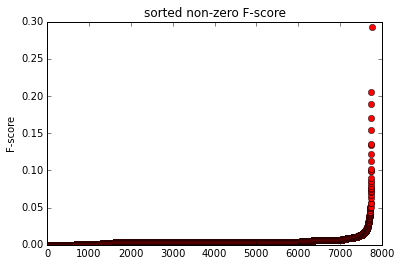

In [15]:
plt.plot(np.sort(FScore[0:k]),'ro')
plt.title('sorted non-zero F-score')
plt.ylabel('F-score')
plt.savefig('fscore.pdf')

256

In [17]:
maskF=FScore>0
print np.sum(maskF)
I=index[0:k].astype(int)
print len(I)
# print I
np.sum(FScore[0:k]==0)

7751
7751


0

In [21]:
I=index[0:k].astype(int)

numpy.matrixlib.defmatrix.matrix

In [22]:
clf = svm.SVC()
clf.fit(Xtrain[:,I], Ytrain) 
PredF=clf.predict(Xvalid[:,I])
pfMask=(Yvalid==1)
nfMask=(Yvalid==-1)
Pf=None
Nf=None
Pf=PredF[pfMask]+Yvalid[pfMask]
Nf=PredF[nfMask]+Yvalid[nfMask]
errorPf=np.sum(Pf==0)
errorNf=np.sum(Nf==0)
numPos=np.sum(pfMask)
numNeg=np.sum(nfMask)
print(errorPf, errorNf)
print(numPos, numNeg)
BEF=1.0/2*(errorPf*1.0/numPos+errorNf*1.0/numNeg)*100
print('BEF', BEF)

(0, 119)
(150, 150)
('BEF', 39.666666666666664)


In [20]:
PredF

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1.])

In [21]:
clf = svm.SVC()
clf.fit(Xtrain[:,I], Ytrain) 
PredF=clf.predict(Xv[:,I])
pfMask=None
nfMask=None
pfMask=(Yv==1)
nfMask=(Yv==-1)
Pf=None
Nf=None
Pf=PredF[pfMask]+Yv[pfMask]
Nf=PredF[nfMask]+Yv[nfMask]
errorPf=np.sum(Pf==0)
errorNf=np.sum(Nf==0)
numPos=np.sum(pfMask)
numNeg=np.sum(nfMask)
print(errorPf, errorNf)
print(numPos, numNeg)
BEF=1.0/2*(errorPf*1.0/numPos+errorNf*1.0/numNeg)*100
print('BEF', BEF)

(150, 0)
(150, 150)
('BEF', 50.0)
